<a href="https://colab.research.google.com/github/Adeyinka-hub/MY-MACHINE-LEARNING-AND-DEEP-LEARNING-WORKS-ON-KAGGLE-AND-ZINDI-RESPECTIVELY/blob/master/DSN%20Pre-Bootcamp%20Hackathon(ZINDI%20platform)%20-The%20Excellent%20Store%20Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 19th position on Zindi Leaderboard

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('/content/train (43).csv')
test = pd.read_csv('/content/test (28).csv')
sub = pd.read_csv('/content/SampleSubmission (22).csv')

In [ ]:
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [ ]:
test.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


In [ ]:
train.isnull().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

In [ ]:
test.isnull().sum()

Item_ID                  0
Store_ID                 0
Item_Store_ID            0
Item_Weight            661
Item_Sugar_Content       0
Item_Visibility          0
Item_Type                0
Item_Price               0
Store_Start_Year         0
Store_Size             959
Store_Location_Type      0
Store_Type               0
dtype: int64

In [ ]:
train['Item_Type_count']= train.groupby(["Item_Type"])["Item_Store_ID"].transform("count")
test['Item_Type_count'] = test.groupby(["Item_Type"])["Item_Store_ID"].transform("count")

train['Store_Size_count']= train.groupby(["Store_Size"])["Item_Store_ID"].transform("count")
test['Store_Size_count'] = test.groupby(["Store_Size"])["Item_Store_ID"].transform("count")

train['Store_Type_count']= train.groupby(["Store_Type"])["Item_Store_ID"].transform("count")
test['Store_Type_count'] = test.groupby(["Store_Type"])["Item_Store_ID"].transform("count")

In [ ]:
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Item_Type_count,Store_Size_count,Store_Type_count
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08,261,NaN,724
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,261,594.0,3304
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,261,NaN,3304
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,261,1582.0,500
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,261,1364.0,3304


In [ ]:
train['no_of_year_till_date'] = 2020 - train['Store_Start_Year']
test['no_of_year_till_date'] = 2020 - test['Store_Start_Year']
train = train.drop(['Store_Start_Year'], axis = 1)
test = test.drop(['Store_Start_Year'], axis = 1)

In [ ]:
train = train.drop(['Item_ID','Store_ID'], axis = 1)
test = test.drop(['Item_ID','Store_ID'], axis = 1)

In [ ]:
train.shape, test.shape

((4990, 14), (3532, 13))

In [ ]:
train.head()

,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Item_Type_count,Store_Size_count,Store_Type_count,no_of_year_till_date
0,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,NaN,Cluster 3,Grocery Store,709.08,261,NaN,724,15
1,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,High,Cluster 3,Supermarket Type1,6381.69,261,594.0,3304,26
2,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,NaN,Cluster 2,Supermarket Type1,6381.69,261,NaN,3304,6
3,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,Medium,Cluster 3,Supermarket Type2,2127.23,261,1582.0,500,4
4,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,Small,Cluster 2,Supermarket Type1,2481.77,261,1364.0,3304,9


In [ ]:
test.head()

,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Size,Store_Location_Type,Store_Type,Item_Type_count,Store_Size_count,Store_Type_count,no_of_year_till_date
0,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,NaN,Cluster 3,Grocery Store,184,NaN,358,15
1,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,High,Cluster 3,Supermarket Type1,184,338.0,2273,26
2,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,High,Cluster 3,Supermarket Type1,184,338.0,2273,26
3,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,NaN,Cluster 3,Grocery Store,184,NaN,358,15
4,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,High,Cluster 3,Supermarket Type1,184,338.0,2273,26


In [ ]:
train.columns

Index(['Item_Store_ID', 'Item_Weight', 'Item_Sugar_Content', 'Item_Visibility',
       'Item_Type', 'Item_Price', 'Store_Size', 'Store_Location_Type',
       'Store_Type', 'Item_Store_Returns', 'Item_Type_count',
       'Store_Size_count', 'Store_Type_count', 'no_of_year_till_date'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Store_ID         4990 non-null   object 
 1   Item_Weight           4188 non-null   float64
 2   Item_Sugar_Content    4990 non-null   object 
 3   Item_Visibility       4990 non-null   float64
 4   Item_Type             4990 non-null   object 
 5   Item_Price            4990 non-null   float64
 6   Store_Size            3540 non-null   object 
 7   Store_Location_Type   4990 non-null   object 
 8   Store_Type            4990 non-null   object 
 9   Item_Store_Returns    4990 non-null   float64
 10  Item_Type_count       4990 non-null   int64  
 11  Store_Size_count      3540 non-null   float64
 12  Store_Type_count      4990 non-null   int64  
 13  no_of_year_till_date  4990 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 545.9+ KB


In [ ]:
train = train.fillna(value=0)
test = test.fillna(value=0)

In [ ]:
categorical_feats = [
    f for f in train.columns if train[f].dtype == 'object']

categorical_feats
for f_ in categorical_feats:
    
    train[f_] = train[f_].astype('category').cat.codes

In [ ]:
categorical_feats = [
    f for f in test.columns if test[f].dtype == 'object']

categorical_feats
for f_ in categorical_feats:
    
    test[f_] = test[f_].astype('category').cat.codes

In [ ]:
train.head()

,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Item_Type_count,Store_Size_count,Store_Type_count,no_of_year_till_date
0,0,11.6,0,0.068535,14,357.54,0,2,0,709.08,261,0.0,724,15
1,1,11.6,0,0.040912,14,355.79,1,2,1,6381.69,261,594.0,3304,26
2,2,11.6,0,0.041178,14,350.79,0,1,1,6381.69,261,0.0,3304,6
3,3,11.6,0,0.041113,14,355.04,2,2,2,2127.23,261,1582.0,500,4
4,4,11.6,2,0.000000,14,354.79,3,1,1,2481.77,261,1364.0,3304,9


In [ ]:
test_id = test['Item_Store_ID']

In [ ]:
test = test.drop(['Item_Store_ID'],axis =1)

In [ ]:
X=train.drop(['Item_Store_Returns','Item_Store_ID'], axis=1)
y= train.Item_Store_Returns

In [ ]:
 import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=1234)

In [ ]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]; categorical_features_indices

array([ 1,  3,  5,  6,  7,  8, 10, 11])

In [ ]:
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from math import sqrt
from sklearn.model_selection import GridSearchCV
error_test=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=5, random_state=42)
y_pred_error=[]
for train_index, test_index in fold.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    model=LGBMRegressor(n_estimators=1000,eval_metric='RMSE',reg_lambda=3,depth=4,learning_rate=0.21202)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=200,verbose=100)
    preds=model.predict(X_val)
    error_test.append(sqrt(mean_squared_error(y_val,preds)))
    pred = model.predict(test)
    y_pred_error.append(pred)

Training until validation scores don't improve for 200 rounds.
[100]	training's l2: 3.75648e+06	valid_1's l2: 9.79743e+06
[200]	training's l2: 2.41659e+06	valid_1's l2: 1.04263e+07
Early stopping, best iteration is:
[10]	training's l2: 7.47326e+06	valid_1's l2: 8.67061e+06
Training until validation scores don't improve for 200 rounds.
[100]	training's l2: 3.72069e+06	valid_1's l2: 1.07265e+07
[200]	training's l2: 2.29421e+06	valid_1's l2: 1.13693e+07
Early stopping, best iteration is:
[9]	training's l2: 7.37649e+06	valid_1's l2: 9.69434e+06
Training until validation scores don't improve for 200 rounds.
[100]	training's l2: 3.7124e+06	valid_1's l2: 1.00597e+07
[200]	training's l2: 2.30266e+06	valid_1's l2: 1.09683e+07
Early stopping, best iteration is:
[17]	training's l2: 6.64998e+06	valid_1's l2: 9.05364e+06
Training until validation scores don't improve for 200 rounds.
[100]	training's l2: 3.78967e+06	valid_1's l2: 9.67231e+06
[200]	training's l2: 2.40601e+06	valid_1's l2: 1.01058e+07

In [ ]:
sub_id = sub['Item_Store_ID']

In [ ]:
sub['Item_Store_ID'] = sub_id
sub['Item_Store_Returns'] = np.mean(y_pred_error, 0)

In [ ]:
sub.head()

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,1676.353543
1,DRA59_BABATUNJI013,7521.955408
2,DRB01_BABATUNJI013,7354.947330
3,DRB13_BABATUNJI010,1517.498157
4,DRB13_BABATUNJI013,7390.739611


In [ ]:
sub.to_csv("store_sub.csv",index =False)

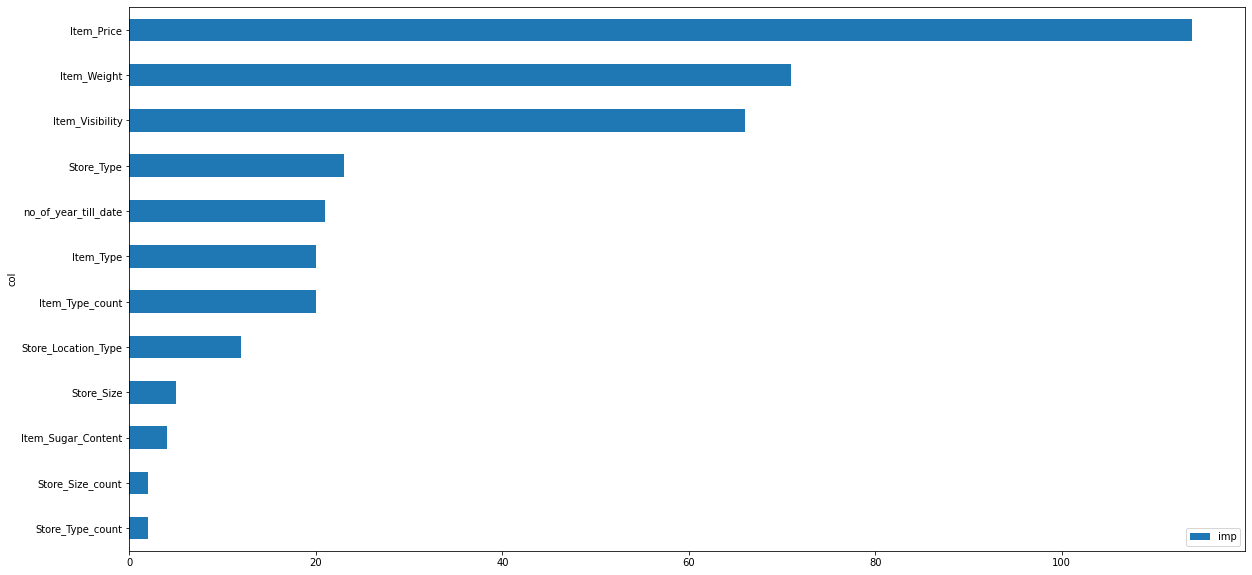

In [ ]:
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')    

#Lgbm bayesian Optimization:

In [ ]:
!pip install bayesian-optimization

In [ ]:
import lightgbm as lgb
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def bayesion_opt_lgbm(X, y, init_iter=3, n_iters=7, random_state=11, seed = 101, num_iterations = 100):
  dtrain = lgb.Dataset(data=X, label=y)
  def lgb_mse(preds, dtrain):
      labels = dtrain.get_label()
      return 'mse', mean_squared_error(labels, preds), True
  # Objective Function
  def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
        
          params = {'application':'regression','num_iterations': num_iterations,
                    'learning_rate':0.21202, 'early_stopping_round':50,
                    'metric':'lgb_mse'} # Default parameters
          params["num_leaves"] = int(round(num_leaves))
          params['feature_fraction'] = max(min(feature_fraction, 1), 0)
          params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
          params['max_depth'] = int(round(max_depth))
          params['min_split_gain'] = min_split_gain
          params['min_child_weight'] = min_child_weight
          cv_results = lgb.cv(params, dtrain, nfold=5, seed=seed,categorical_feature=[], stratified=False,
                              verbose_eval =None, feval=lgb_mse)
          # print(cv_results)
          return np.max(cv_results['mse-mean'])
  # Domain space-- Range of hyperparameters 
  pds = {'num_leaves': (80, 100),
            'feature_fraction': (0.1, 0.9),
            'bagging_fraction': (0.8, 1),
            'max_depth': (17, 25),
            'min_split_gain': (0.001, 0.1),
            'min_child_weight': (10, 25)
            }

  # Surrogate model
  optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=random_state)
                                    
  # Optimize
  optimizer.maximize(init_points=init_iter, n_iter=n_iters)

bayesion_opt_lgbm(X, y, init_iter=5, n_iters=10, random_state=77, seed = 101, num_iterations = 1000)

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        |  1.634e+0 |  0.9838   |  0.6138   |  23.03    |  12.09    |  0.009645 |  95.76    |
|  2        |  1.634e+0 |  0.8652   |  0.5329   |  18.92    |  18.18    |  0.04065  |  94.3     |
|  3        |  1.635e+0 |  0.9673   |  0.5708   |  19.37    |  14.22    |  0.07085  |  88.45    |
|  4        |  1.635e+0 |  0.8115   |  0.6976   |  20.62    |  12.64    |  0.005888 |  85.85    |
|  5        |  1.634e+0 |  0.8134   |  0.7009   |  17.51    |  16.48    |  0.03705  |  83.04    |
|  6        |  1.635e+0 |  0.8259   |  0.6859   |  20.55    |  12.73    |  0.01155  |  86.12    |
|  7        |  1.635e+0 |  0.8183   |  0.692    |  20.59    |  12.67    |  0.008653 |  85.99    |
|  8        |  1.635e+0 |  0.824    |  0.6892   |  20.44    |  12.84    |  0.008947 |  85.92    |
|  9        |  1.635